# Part II - Insights from the Prosper Loan Dataset
## by David Apine Kwenev

## Investigation Overview
The goal of this presentation is to draw our attention to some key features that possibly affect whether or not loan will be given to a borrower and the Loan Amount. The following insights will be presented and discussed:

- It was found that 31% of borrowers earn between 50000 to 75000 dollars while 28% earn between 25000 to 50000 US dollars.
- Borrowers that fall within these two Income Ranges constitute more than 50% of the entire dataset.
- 37% of the borrowers come from 5 states namely (in decreasing order of pupolarity); California, New York, Texas, Florida, and Illinois with California taking the lead with about 13% borrowers.
- 64% of the borrowers listed **Debt Consolidation** as their reason for taking the loan. Only about 5% of them mentioned **Business** as reason for the loan.
- Being a home owner as well as having a high income plays a very big role on the Loan Amount.

## Dataset Overview
The [dataset](https://www.google.com/url?q=https://www.google.com/url?q%3Dhttps://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv%26amp;sa%3DD%26amp;ust%3D1581581520570000&sa=D&source=editors&ust=1678221709762763&usg=AOvVaw2b_sgw5A_aYBCO_k05-0Pi) contains 113,937 records of loans with 81 features for each loan.   
The [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1678221709763697&usg=AOvVaw1OQTd8dKmyZ1zfhIVnVwvJ) explains the features in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('loan_df_final.csv')
loan_df.head(2)

,Term,PublicRecordsLast10Years,PublicRecordsLast12Months,LoanStatus,EstimatedEffectiveYield,BorrowerAPR,BankcardUtilization,BorrowerRate,ProsperRating_Numeric,ProsperRating_Alpha,...,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors,BorrowerState
0,36,1.0,0.0,Current,0.0796,0.12016,0.21,0.0920,6.0,A,...,True,6125.0,318.93,0,0.18,10000,1.0,"$50,000-74,999",1,CO
1,36,0.0,0.0,Current,0.0849,0.12528,0.04,0.0974,6.0,A,...,True,2875.0,321.45,0,0.15,10000,1.0,"$25,000-49,999",158,GA


## Visualization1: How the Income Range of the borrowers is distributed

It was found from the analysis that 31% of borrowers earn between 50000 to 75000 dollars while 28% earn between 25000 to 50000 US dollars.  
It is also worthy of note that, borrowers that fall within these two Income Ranges constitute more than 50% of the entire sample.

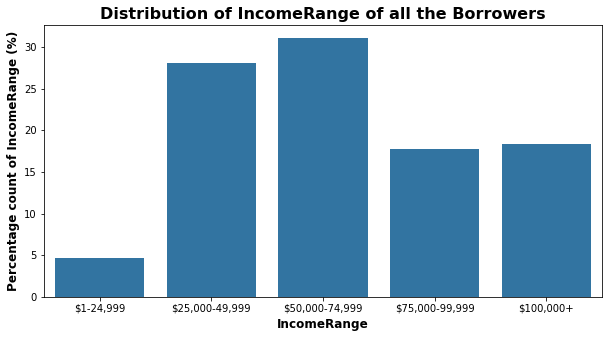

In [3]:
#Make the IncomeRange variable categorical and ordinal
IncomeRanges = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRanges)
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype(vclasses_1)

income_range = loan_df['IncomeRange'].value_counts(normalize=True)
#plot the IncomeRange
plt.figure(figsize = (10, 5))
base_color = sb.color_palette()[0]
font={'fontsize': 12, 'fontweight': 'bold'}
sb.barplot(x=income_range.index, y=income_range*100, color = base_color)
plt.xlabel('IncomeRange', fontdict=font)
plt.ylabel('Percentage count of IncomeRange (%)', fontdict=font)
font['fontsize'] = 16
plt.title("Distribution of IncomeRange of all the Borrowers", fontdict=font); 

## Visualization 2: Top 5 borrowing states

- 37% of the borrowers come from 5 states namely (in decreasing order of pupolarity); California, New York, Texas, Florida, and Illinois with California taking the lead with about 13% borrowers.

The population in these states could be the reason why they have more borrowers however, no futher analysis was done taking population into account to ascertain this claim.

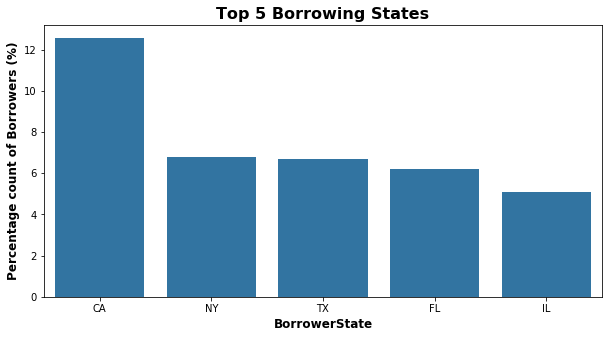

In [9]:
state_counts = loan_df.BorrowerState.value_counts(normalize=True).head()
state_order = state_counts.index

#plot
plt.figure(figsize=(10, 5))
base_color = sb.color_palette()[0]
font={'fontsize': 12, 'fontweight': 'bold'}
sb.barplot(x=state_counts.index, y=state_counts*100, color = base_color)
plt.xlabel('BorrowerState', fontsize=12, fontweight='bold')
plt.ylabel('Percentage count of Borrowers (%)', fontsize=12, fontweight='bold');
plt.title('Top 5 Borrowing States', fontsize=16, fontweight='bold');

## Visualization 3: Top 5 Listing Categories of the Borrowers

- 64% of the borrowers listed **Debt Consolidation** as their reason for taking the loan.
- Only about 5% of them mentioned **Business** as the reason for the loan.

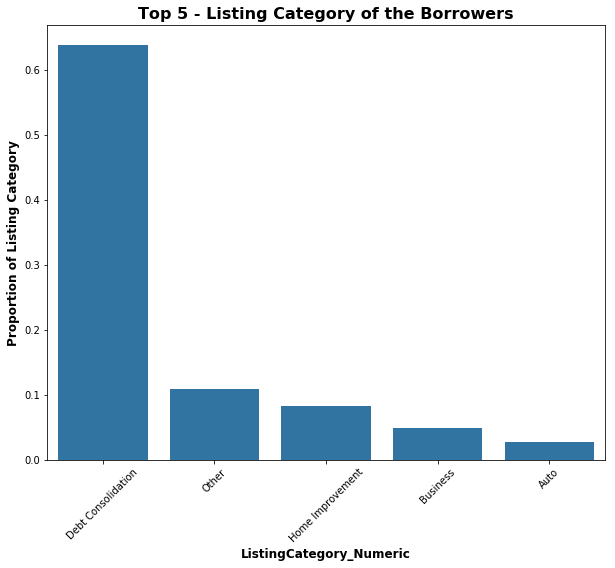

In [11]:
# proportion of top 5 ListingCategory_Numeric
listing_counts = loan_df['ListingCategory_Numeric'].value_counts(normalize=True).head(5)

#plot
plt.figure(figsize = (10, 8)) 
base_color = sb.color_palette()[0]

xtick_labels = ['Debt Consolidation', 'Other', 'Home Improvement', 'Business', 'Auto']
sb.barplot(x=listing_counts.index, y=listing_counts, color=base_color,
           order=listing_counts.index);
plt.xticks([0,1,2,3,4], xtick_labels, rotation=45)
plt.ylabel('Proportion of Listing Category', fontsize=12, fontweight='bold')
plt.xlabel('ListingCategory_Numeric', fontsize=12, fontweight='bold')
plt.title("Top 5 - Listing Category of the Borrowers", fontsize=16, fontweight='bold');

## Visualization 4: 
### How Home owner status, IncomeRange of borrower and Loan Amount are related.
- Being a home owner as well as having a high income plays a very big role on the Loan Amount.
- Home owners consistently have higher Loan Amount across all Income Ranges.

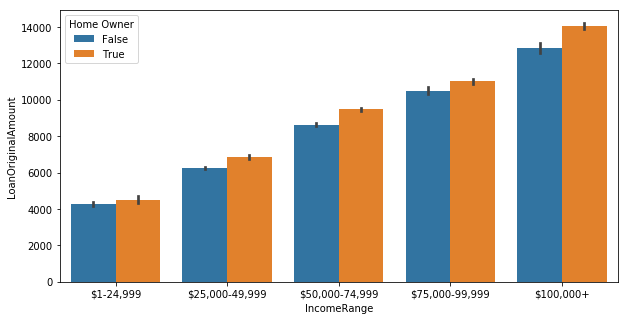

In [12]:
plt.figure(figsize = (10, 5))
sb.barplot(data = loan_df, x = 'IncomeRange', y='LoanOriginalAmount',
           hue = 'IsBorrowerHomeowner')
plt.legend(title='Home Owner');

### Generate Slideshow
Generating the slideshow for this presentation notebook using the `jupyter nbconvert` 

In [19]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Explanation.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Explanation.ipynb to slides
[NbConvertApp] Writing 363740 bytes to Part_II_Explanation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Explanation.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: n